**Kapittel 1 - Innledning**

Gi litt bakgrunn i dette kapitlet.         

Du vil muligens komme inn på følgende:      
- Hva menes med en turistskatt på overnattinger?
- Hva er begrunnelsen for dens innføring?
- Hvor utbredt er dette tiltaket i andre land/byer?
- Hvilke erfaringer har man gjort med en turistskatt?

Til slutt vil kapitlet forteller leseren om utredningens struktur.

*Kandidatnummer* har fått i oppdrag av næringsminister Jan Christian Vestre å gjøre en samfunnsøkonomisk utredning av tiltak som kan gjøres for å innføre besøksbidrag for turisme. Det vi skal se videre på her er besøksbidrag i form av en turistskatt. Norge har i de siste tiårene opplevd en stor vekst i turisme, og regjeringen har gitt grønt lys for at kommuner kan innføre en turistskatt. Dette er en skatt som eksempelvis betales av overnattingsgjester i hoteller, leiligheter og lignende eller som betales i flybilletten til destinasjonen.

Grunnen til å innføre en slik skatt er for å kunne verne miljøet i kommunene som får ekstra stor belastning og bruk på grunn av overturisme. Turistskatt er en form for skatt som har vært innført allerede i flere andre land, og som idag brukes i for eksempel Nederland, Italia, Spania og Hellas.

Med innføring av en turistskatt er det meningen at etterspørselen skal bli lavere i høysesongene av turismen. Dette vil føre til at det blir mindre bruk og miljøbelastning på grunn av overturisme.

I kapittel 2 skal vi se nærmere på turistnæringen i Nord-Norge. I figurer skal vi nærmere se på hvordan hotellnattinger har utviklet seg over tid, hvilken tid på året som har mest turister, hvilke framkomstmidler turister bruker for å besøke Nord-Norge og hvilke overnattingsmetoder de bruker.

I kapittel 3 skal vi se nærmere på hvordan en turistskatt kan påvirke turistnæringen i Nord-Norge. Vi skal se på hvordan en turistskatt påvirker tilbud og etterspørsel etter hotellrom og flybilletter. Vi skal se på hvor stor effekt vi kan forvente av en turistskatt, og vi skal se på hvilke samfunnsøkonomiske konsekvenser turistskatten vil medbringe.

Kapittel 4 blir en sammenfatning av det vi har sett på i kapittel 2 og 3. Her skal vi konkludere med hvilke konsekvenser en turistskatt kommer til å ha for Nord-Norge.

**Kapittel 2 - Turistnæringen i Norge**

Her gir du leseren et overblikk over markedet som du skal analysere. Om du vil kan du begrense deg til Nord-Norge. Finn data som du laster ned og bruker til å tegne figurer for å gi en indikasjon på størrelsen og viktigheten  på dette markedet. For eksempel:       

- Hvordan har antall hotellovernattinger utviklet seg over tid?
- Når på året kommer turister?
- Hva er fordelingen av turister som ankommer via skip (cruise) og med fly, evt andre fremkomstmidler?
- Hvordan er hotelløkonomien?
- Hvor utbredt er private overnattinger gjennom Airbnb og andre plattformer?
- Hvorfor kan disse momentene være viktig for din analyse?

    To for å vise når på året turistene kommer

    en for å vise over tid

In [2]:
# Importing all packages needed for the project
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cbook
import numpy as np
from pyjstat import pyjstat
import matplotlib.ticker as ticker

In [3]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13153/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Senger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [4]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [5]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df = df[df['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df= svalbard_df.copy()

# Converting the date to datetime
svalbard_df['måned'] = pd.to_datetime(svalbard_df['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
svalbard_df = svalbard_df.groupby(svalbard_df['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df=svalbard_df.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df = pd.concat([nordland_df, troms_finnmark_df])

# Making a copy of the dataset
nord_norge_df= nord_norge_df.copy()

nord_norge_df['måned'] = pd.to_datetime(nord_norge_df['måned'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df = nord_norge_df.groupby(nord_norge_df['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df=nord_norge_df.reset_index()

In [6]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KapasitetSeng"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [7]:
# Fixing the dataset so M is replaced with -
df1['måned'] =df1['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df1 = df1[df1['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df1= svalbard_df1.copy()

# Converting the date to datetime
svalbard_df1['måned'] = pd.to_datetime(svalbard_df1['måned'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
svalbard_df1 = svalbard_df1.groupby(svalbard_df1['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df1=svalbard_df1.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df1 = df1[df1['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df1 = df1[df1['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df1 = pd.concat([nordland_df1, troms_finnmark_df1])

# Making a copy of the dataset
nord_norge_df1= nord_norge_df1.copy()

nord_norge_df1['måned'] = pd.to_datetime(nord_norge_df1['måned'], format='%Y-%m')

# Group the dataframe by year and summarize the yearly data and find the mean of the yearly data
nord_norge_df1 = nord_norge_df1.groupby(nord_norge_df1['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df1=nord_norge_df1.reset_index()

,måned,value
0,2016,38.333333
1,2017,40.208333
2,2018,39.208333
3,2019,40.208333
4,2020,28.208333
5,2021,28.333333
6,2022,36.750000


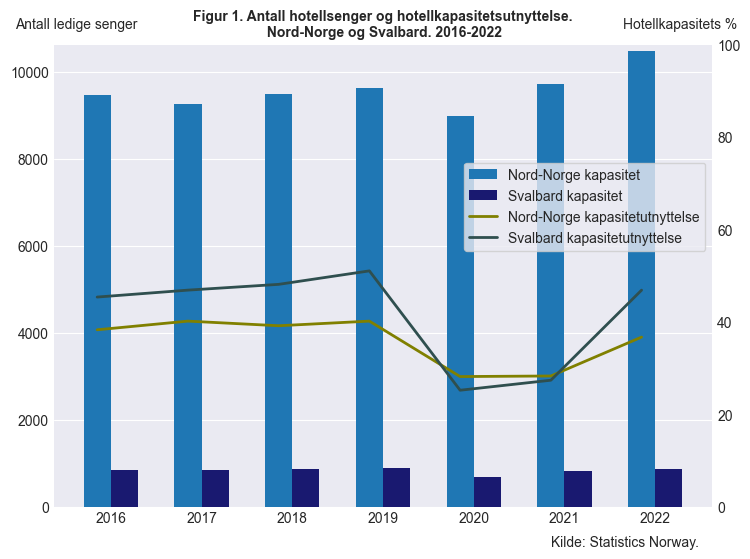

In [19]:
# Setting the style for the plots
plt.style.use('seaborn-v0_8-dark')
# Plotting the data
fig, ax = plt.subplots(figsize=(8.5, 6))

# Calculating the width of the bars
width = 0.3

# np.arange to create the x-axis years
x_p = np.arange(len(nord_norge_df['måned']))

# For loop to create the x-axis years for the second bar
x_d = [x + width for x in x_p]

# Plotting first bar
ax.bar(x_p,nord_norge_df['value'], width=width, label='Nord-Norge kapasitet', color='#1f77b4') # have to put width=width to make sure the bars are next to each other

# Plot the second bar
ax.bar(x_d, svalbard_df['value'], width=width, label='Svalbard kapasitet', color='midnightblue')

# Calculating the position of the tick labels to make the plot centered
ticks_pos = x_p + width/2
# Setting the x_ticks to the position of the tick labels
ax.set_xticks(ticks_pos)
# Setting label for the x_ticks, and making sure the x_ticks are strings to remove decimals
ax.set_xticklabels(nord_norge_df['måned'].astype("string"))
# Set the title and labels
ax.set_title('Figur 1. Antall hotellsenger og hotellkapasitetsutnyttelse.\n Nord-Norge og Svalbard. 2016-2022', fontsize=10, fontweight='bold')
# Fixing the grid
ax.grid(axis='y')
# Caption
ax.text(5, -900, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(5.8, 11000, 'Hotellkapasitets %', fontsize=10)
ax.text(-0.9, 11000, 'Antall ledige senger', fontsize=10)
# Fixing max y value
ax.set_ylim(0, 10630)
# Making a second y-axis
ax2 = ax.twinx()
# Plotting the data for the second y-axis, using astype to make sure the x-axis is a string for not having decimals
ax2.plot(nord_norge_df1['måned'].astype('string'),nord_norge_df1['value'],color="olive", label = "Nord-Norge kapasitetutnyttelse", lw=2)
ax2.plot(svalbard_df1['måned'].astype('string'), svalbard_df1["value"],color="darkslategrey", label = "Svalbard kapasitetutnyttelse", lw=2)
# Setting the y-axis limit for percentage
ax2.set_ylim(0, 100)
#  Fixing the legend together for both y-axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.5, 0.4, 0.5, 0.5), frameon=True);

In [9]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/09266/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "SUMRL"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [10]:
# Pivoting the dataframe
pivot = pd.pivot_table(df, index='år', columns='region', values='value')

# renaming the columns
pivot.columns = [col.split(" - ")[0] for col in pivot.columns]

# resetting the index
pivot = pivot.reset_index()

#Deleting the first row to start the timeseries from 2013 since 2012 is missing
pivot = pivot.iloc[1:]

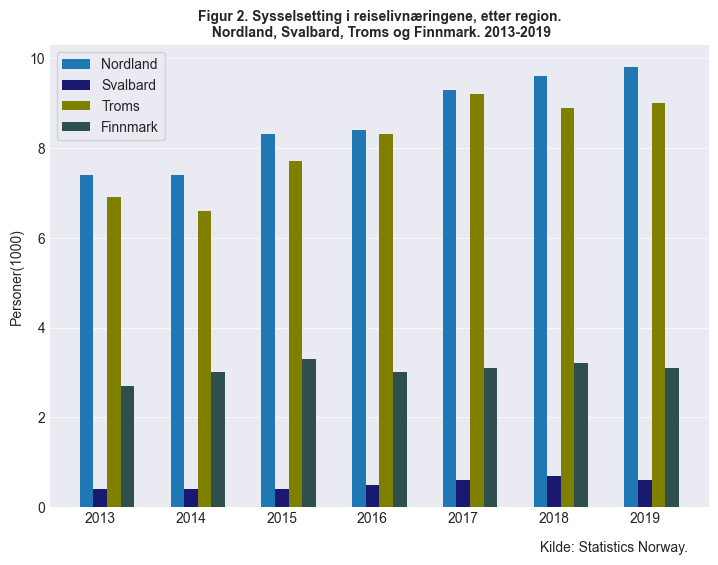

In [11]:
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Fixing the width of the bars
width=0.15
# shift the bars to the left by the width of the bar to separate them
x1 = np.arange(len(pivot['år']))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]
# Plotting the bars
ax1.bar(x1, pivot['Nordland'], width=width, label='Nordland', color='#1f77b4')
ax1.bar(x2, pivot['Svalbard'], width=width, label='Svalbard', color='midnightblue')
ax1.bar(x3, pivot['Troms'], width=width, label='Troms', color='olive')
ax1.bar(x4, pivot['Finnmark'], width=width, label='Finnmark', color='darkslategrey')

# set the x-tick positions to the middle of the bars
ax1.set_xticks(x2)
# Set the x-tick labels to the year
ax1.set_xticklabels(pivot['år'].astype("string"))
#Setting the title
ax1.set_title('Figur 2. Sysselsetting i reiselivnæringene, etter region.\n Nordland, Svalbard, Troms og Finnmark. 2013-2019', fontsize=10, fontweight='bold')
# Source and note
ax1.text(x=5, y=-1, s='Kilde: Statistics Norway.', fontsize=10)
# Setting the y-label
ax1.set_ylabel('Personer(1000)', fontsize=10)

# Setting grid and legend
ax1.grid(axis='y', alpha=0.7)
ax1.legend(loc='best', frameon=True);

Skrive en kort tekst om figuren ovenfor

In [12]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13154/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [13]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Making a copy of the dataset
df= df.copy()

# Converting the date to datetime
df['måned'] = pd.to_datetime(df['måned'], format='%Y-%m')

df.set_index('måned', inplace=True)

first_year = df[df.index.year == df.index[0].year]

last_year = df[df.index.year == df.index[-1].year]

first_year = first_year.groupby(['måned']).sum(numeric_only=True)

last_year = last_year.groupby(['måned']).sum(numeric_only=True)

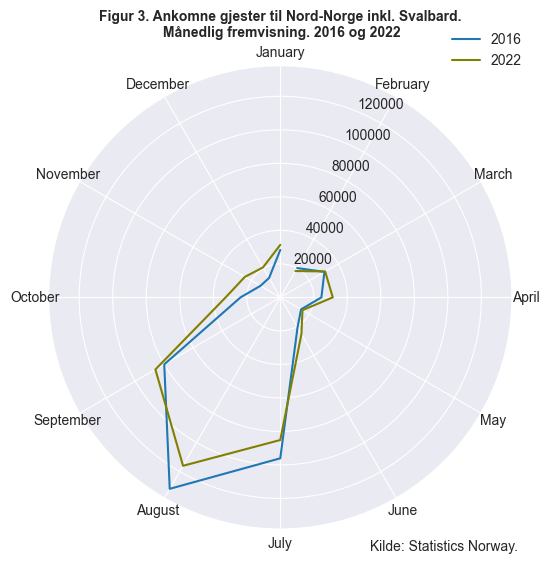

In [14]:
# Starting the polar plot
fig = plt.figure(figsize=(8.5, 6))
ax = fig.add_subplot(111, polar=True)

# Plot the data for the first year
ax.plot(first_year.index.month / 12 * 2 * np.pi, first_year['value'], label='2016', color = '#1f77b4')
# Plot the data for the last year
ax.plot(last_year.index.month / 12 * 2 * np.pi, last_year['value'], label='2022', color = 'olive')

ax.set_title('Figur 3. Ankomne gjester til Nord-Norge inkl. Svalbard.\n Månedlig fremvisning. 2016 og 2022', fontsize=10, fontweight='bold')

# Set the xticks to the number of months.
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
# Setting the monthly ticks
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# Setting the location of the zero
ax.set_theta_zero_location('N')
#  Setting the direction of the plot
ax.set_theta_direction(-1)
#Fixing the y-axis
ax.set_yticklabels
# Source
ax.text(x=2.8, y=160000, s='Kilde: Statistics Norway.', fontsize=10)
#  Setting the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1.1), fontsize=10);

Skrive en kort tekst om figuren ovenfor

In [15]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PrisRom"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [16]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
svalbard_df2 = df[df['region'] == 'Svalbard']

# Making a copy of the dataset
svalbard_df2= svalbard_df2.copy()

# Converting the date to datetime
svalbard_df2['måned'] = pd.to_datetime(svalbard_df2['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
svalbard_df2 = svalbard_df2.groupby(svalbard_df2['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
svalbard_df2=svalbard_df2.reset_index()

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df2 = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df2 = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df2 = pd.concat([nordland_df2, troms_finnmark_df2])

# Making a copy of the dataset
nord_norge_df2= nord_norge_df2.copy()

nord_norge_df2['måned'] = pd.to_datetime(nord_norge_df2['måned'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df2 = nord_norge_df2.groupby(nord_norge_df2['måned'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df2=nord_norge_df2.reset_index()

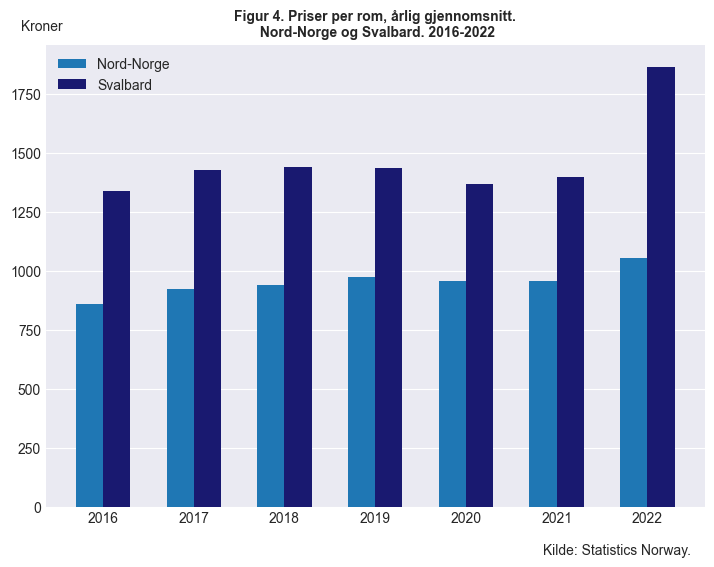

In [17]:
# Plotting the data
fig, ax = plt.subplots(figsize=(8.5, 6))
#Fixing the width of the bars
width = 0.3
# np.arange to create the x-axis years
x_p = np.arange(len(nord_norge_df2['måned']))

# For loop to create the x-axis years for the second bar
x_d = [x + width for x in x_p]

# Plotting first bar, have to use .astype string to convert the date to string so it doesnt give decimals in year
ax.bar(x_p,nord_norge_df2['value'], width=width, label='Nord-Norge', color='#1f77b4') # have to put width=width to make sure the bars are next to each other

# Plot the second bar
ax.bar(x_d, svalbard_df2['value'], width=width, label='Svalbard', color='midnightblue')

# Calculating the position of the tick labels to make the plot centered
ticks_pos = x_p + width/2
# Setting the x_ticks to the position of the tick labels
ax.set_xticks(ticks_pos)
# Setting label for the x_ticks
ax.set_xticklabels(nord_norge_df2['måned'].astype("string"))
# Set the title and labels
ax.set_title('Figur 4. Priser per rom, årlig gjennomsnitt.\n Nord-Norge og Svalbard. 2016-2022', fontsize=10, fontweight='bold')
# Fixing the grid
ax.grid(axis='y')
# caption og y-akse label
ax.text(5, -200, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(-0.75, 2020, 'Kroner', fontsize=10)
# legende
ax.legend(loc='upper left');

Skrive en kort tekst om figuren ovenfor

**Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt**

I dette kapitlet gjennomfører du analysen. Du kan vurdere å ta med følgende elementer:      

- Hva er formålet med å innføre en turistskatt på overnattinger?
- Hvordan fungerer markedet for overnattinger uten en skatt?
- Hvilke endringer forventer vi etter at skatten blir innført?
- Hvilke effektivitets- og fordelingseffekter har dette tiltaket?
- Hvor store effekter forventer vi, og hva er dette avhengig av?
- Finnes det noen estimat på sentrale parameter (for eksempel priselastisiteten på etterspørsel etter overnattinger) som vi kan bruke for å konkretisere analysen?
- En vurdering av hvorvidt formålet med tiltaket oppfylles.

I kurset så langt har vi brukt ulike varianter av markedskrysset for å analysere forskjellige markeder, og dette blir verktøyet som brukes her også. Husk å gi en god forklaring av alle figurer som du lager i forbindelse med analysen. Dere har alt dere trenger! (Om du vil gå noe utover det som vi har snakket om i kurset så langt kan det være en idé å se på kapittel 13 i læreboka om "eksterne virkninger").        

**Kapittel 4 - Konklusjon**

Her oppsummerer du kort dinne funn fra analysen, og råd til Nærings- og fiskeridepartementet.     


Konklusjon her